# Tuberculosis - Brazil

# Lesson 1 - Time Series

---

# Lesson 01 - part 01 - What are time series?

## 1. Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dateparser
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 2. Getting the data

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv'

tuberculosis = pd.read_csv(url, encoding='ISO-8859-1',
                           sep=';', skiprows=3,
                           skipfooter=16, engine='python')

tuberculosis.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [3]:
tuberculosis.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


### Challenge 01: Convert the dataset into 'time series format' - year/month

In [4]:
tuberculosis.drop('Total', axis=1, inplace=True)
tuberculosis.drop(19, axis=0, inplace=True)

tuberculosis.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
14,2015,7111,6160,7833,6880,6893,6916,7531,7463,7189,7345,7287,6844
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220


In [5]:
tuberculosis_melted = \
    (tuberculosis.melt(id_vars=['Ano Diagnóstico'], 
                       value_vars=['Jan', 'Fev', 'Mar', 
                                   'Abr', 'Mai', 'Jun', 
                                   'Jul', 'Ago', 'Set', 
                                   'Out', 'Nov', 'Dez'],
                       var_name='month_pt',
                       value_name='qty')
                 .rename(columns={'Ano Diagnóstico' : 'year'}))

tuberculosis_melted.tail()

,year,month_pt,qty
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900
227,2019,Dez,7220


In [6]:
# my solution
def pt_month_str_to_datetime_object(month: str):
    return dateparser.parse(month, languages=['pt']).month

tuberculosis_melted['month'] = \
    tuberculosis_melted['month_pt'].map(pt_month_str_to_datetime_object)

tuberculosis_melted.head()


tuberculosis_melted['diagnosis_date'] = \
    pd.to_datetime(tuberculosis_melted[['year', 'month']].assign(Day=1))

tuberculosis_melted.head()

,year,month_pt,qty,month,diagnosis_date
0,2001,Jan,8088,1,2001-01-01
1,2002,Jan,8013,1,2002-01-01
2,2003,Jan,8115,1,2003-01-01
3,2004,Jan,7574,1,2004-01-01
4,2005,Jan,7432,1,2005-01-01


# Lesson 1 - part 02 - preparing the data

In [7]:
# another solution
tuberculosis_melted['diagnosis_date_2'] = \
    tuberculosis_melted['year']+'-'+tuberculosis_melted['month_pt']

tuberculosis_melted.head()

,year,month_pt,qty,month,diagnosis_date,diagnosis_date_2
0,2001,Jan,8088,1,2001-01-01,2001-Jan
1,2002,Jan,8013,1,2002-01-01,2002-Jan
2,2003,Jan,8115,1,2003-01-01,2003-Jan
3,2004,Jan,7574,1,2004-01-01,2004-Jan
4,2005,Jan,7432,1,2005-01-01,2005-Jan


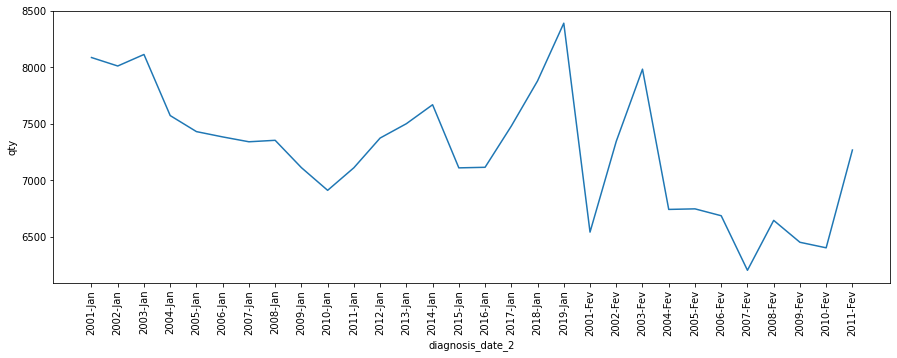

In [8]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_melted[:30],
             x='diagnosis_date_2',
             y='qty')

plt.xticks(rotation=90);

- the date is not sorted, because it's a string not a date.

In [9]:
tuberculosis_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              228 non-null    object        
 1   month_pt          228 non-null    object        
 2   qty               228 non-null    int64         
 3   month             228 non-null    int64         
 4   diagnosis_date    228 non-null    datetime64[ns]
 5   diagnosis_date_2  228 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 10.8+ KB


- my solution solve this problem because I created a datetime column.

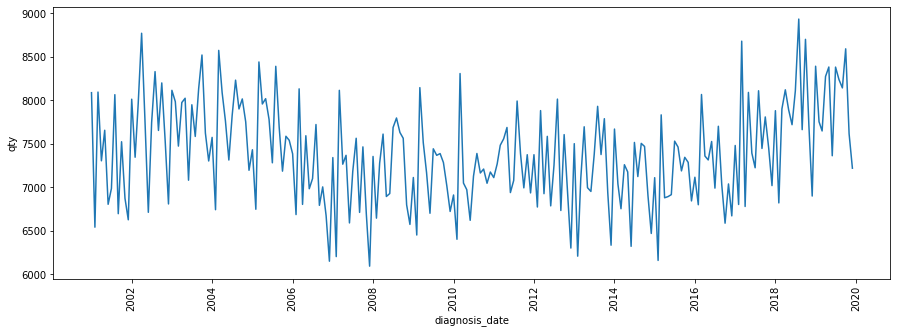

In [10]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_melted,
             x='diagnosis_date',
             y='qty')

plt.xticks(rotation=90);

### Challenge 02: Convert the diagnosis_date_2 into datetime format.

My Challenge 01 solution already solve this problem. However, to practice, let's convert the column into datetime format.

In [11]:
def pt_date_str_to_datetime_object(year_month: str):
    return dateparser.parse(year_month+'/1', languages=['pt'])

tuberculosis_melted['diagnosis_date_3'] = \
    tuberculosis_melted['diagnosis_date_2'].map(pt_date_str_to_datetime_object)

tuberculosis_melted.head()

,year,month_pt,qty,month,diagnosis_date,diagnosis_date_2,diagnosis_date_3
0,2001,Jan,8088,1,2001-01-01,2001-Jan,2001-01-01
1,2002,Jan,8013,1,2002-01-01,2002-Jan,2002-01-01
2,2003,Jan,8115,1,2003-01-01,2003-Jan,2003-01-01
3,2004,Jan,7574,1,2004-01-01,2004-Jan,2004-01-01
4,2005,Jan,7432,1,2005-01-01,2005-Jan,2005-01-01


In [12]:
tuberculosis_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              228 non-null    object        
 1   month_pt          228 non-null    object        
 2   qty               228 non-null    int64         
 3   month             228 non-null    int64         
 4   diagnosis_date    228 non-null    datetime64[ns]
 5   diagnosis_date_2  228 non-null    object        
 6   diagnosis_date_3  228 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 12.6+ KB


# Lesson 2 - Manipulating Data - datetime format

How the teachers solved the problem of convert the month from Portuguese to English.

I already did it through `dateparser.parse`.

In [13]:
month_pt_en = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}


tuberculosis_melted['month_pt'].map(month_pt_en)

# create a column with the month in English
# join the strings year and month in English
# use pd.to_datetime() in the column with the strings added

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
223    Dec
224    Dec
225    Dec
226    Dec
227    Dec
Name: month_pt, Length: 228, dtype: object

In [14]:
# solution from discord

# !locale-gen "pt_BR.UTF-8"

# import locale
# locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# pd.to_datetime(tuberculosis_melted['diagnosis_date_2'], format='%Y-%b')

In [15]:
tuberculosis_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              228 non-null    object        
 1   month_pt          228 non-null    object        
 2   qty               228 non-null    int64         
 3   month             228 non-null    int64         
 4   diagnosis_date    228 non-null    datetime64[ns]
 5   diagnosis_date_2  228 non-null    object        
 6   diagnosis_date_3  228 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 12.6+ KB


In [16]:
tuberculosis_ts = tuberculosis_melted[['diagnosis_date', 'qty']].copy()

tuberculosis_ts.head()

,diagnosis_date,qty
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432


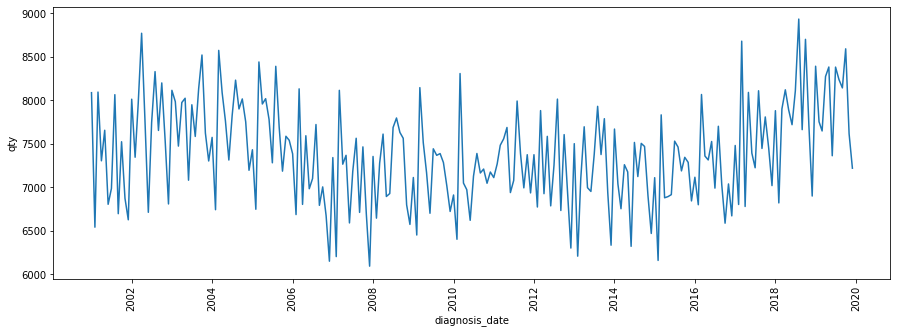

In [17]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

plt.xticks(rotation=90);

### Challenge 01: Reproduce the code above (convert str to datetime) with another dataset - leprosy.

- Getting the data

In [18]:
url_leprosy = 'https://raw.githubusercontent.com/gabrielatrindade/alura-bootcamp/master/module4/data/A123202189_28_143_208.csv'

leprosy = pd.read_csv(url_leprosy, encoding='ISO-8859-1',
                      sep=';', skiprows=3,
                      skipfooter=10, engine='python',
                      na_values='-')

leprosy.drop('Total', axis=1, inplace=True)
leprosy.drop(46, inplace=True)
leprosy.drop(0, inplace=True)
leprosy.reset_index(drop=True, inplace=True)


leprosy.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
40,2015,2729.0,2969.0,3476.0,2930.0,3017.0,2969.0,3018.0,3244.0,3241.0,3075.0,2819.0,2412.0
41,2016,2393.0,2540.0,3000.0,2702.0,2616.0,2957.0,2603.0,3113.0,2881.0,2644.0,2528.0,2213.0
42,2017,2585.0,2718.0,3162.0,2557.0,3243.0,2806.0,2739.0,3288.0,2856.0,3275.0,2961.0,2448.0
43,2018,2971.0,2877.0,3276.0,3157.0,3237.0,2913.0,2976.0,3644.0,3274.0,3423.0,2909.0,2268.0
44,2019,3105.0,3319.0,2804.0,3037.0,3047.0,2567.0,2856.0,3107.0,3060.0,3137.0,2715.0,1886.0


- Manipulating it

In [19]:
leprosy_melted = (leprosy.melt(id_vars='Ano Diagnóstico',
                              value_name='cases',
                              var_name='month_pt')
                         .rename(columns={'Ano Diagnóstico' : 'year'}))

leprosy_melted.reset_index(drop=True, inplace=True)

leprosy_melted

,year,month_pt,cases
0,1975,Jan,NaN
1,1976,Jan,NaN
2,1977,Jan,2.0
3,1978,Jan,NaN
4,1979,Jan,2.0
...,...,...,...
535,2015,Dez,2412.0
536,2016,Dez,2213.0
537,2017,Dez,2448.0
538,2018,Dez,2268.0


- Creating datetime column

In [20]:
leprosy_melted['month'] = leprosy_melted['month_pt'].map(pt_month_str_to_datetime_object)
leprosy_melted['date'] = pd.to_datetime(leprosy_melted[['year', 'month']].assign(Day=1))

leprosy_melted

,year,month_pt,cases,month,date
0,1975,Jan,NaN,1,1975-01-01
1,1976,Jan,NaN,1,1976-01-01
2,1977,Jan,2.0,1,1977-01-01
3,1978,Jan,NaN,1,1978-01-01
4,1979,Jan,2.0,1,1979-01-01
...,...,...,...,...,...
535,2015,Dez,2412.0,12,2015-12-01
536,2016,Dez,2213.0,12,2016-12-01
537,2017,Dez,2448.0,12,2017-12-01
538,2018,Dez,2268.0,12,2018-12-01


- Selecting the columns, sorting the values

In [21]:
leprosy_ts = leprosy_melted[['date', 'cases']] \
                  .copy() \
                  .sort_values('date', ascending=True) \
                  .reset_index(drop=True) \
        
        
        
leprosy_ts.head()

,date,cases
0,1975-01-01,NaN
1,1975-02-01,1.0
2,1975-03-01,NaN
3,1975-04-01,NaN
4,1975-05-01,NaN


- Fill null values

In [22]:
leprosy_ts['cases'].fillna(method='backfill', inplace=True)
leprosy_ts

,date,cases
0,1975-01-01,1.0
1,1975-02-01,1.0
2,1975-03-01,1.0
3,1975-04-01,1.0
4,1975-05-01,1.0
...,...,...
535,2019-08-01,3107.0
536,2019-09-01,3060.0
537,2019-10-01,3137.0
538,2019-11-01,2715.0


### Challenge 02: Improve the line plot.

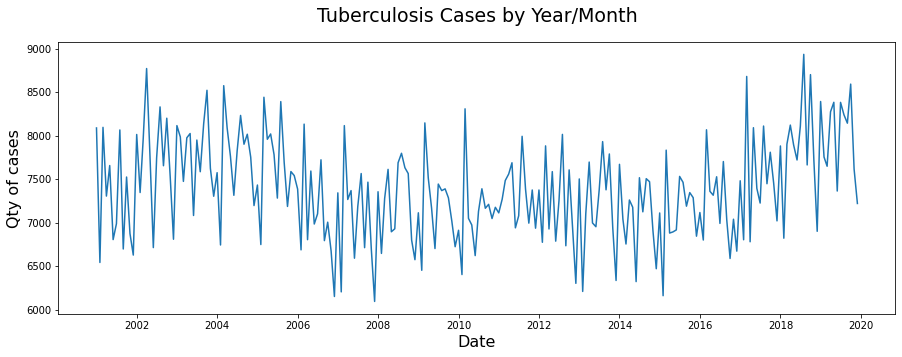

In [23]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Qty of cases', fontsize=16)
plt.title('Tuberculosis Cases by Year/Month', fontsize=19, pad=20);

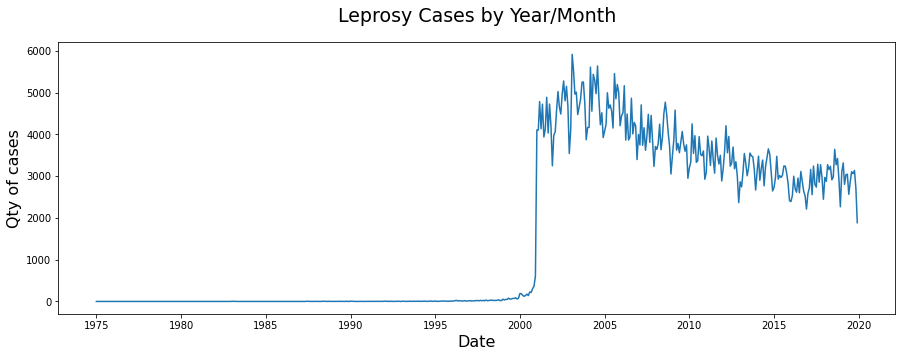

In [24]:
plt.figure(figsize=(15,5))

sns.lineplot(data=leprosy_ts,
             x='date',
             y='cases')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Qty of cases', fontsize=16)
plt.title('Leprosy Cases by Year/Month', fontsize=19, pad=20);

# Lesson 3 - Starting time series analysis -  Trends and moving average

**Challenge 01: Search about frequency spectrum**

- to analyse the curve trends, we calculate the moving average

In [25]:
# calculate 'qty' every 3 months
tuberculosis_ts['qty'].rolling(3)

Rolling [window=3,center=False,axis=0]

In [26]:
# sum qty every 3 months
tuberculosis_ts['qty'].rolling(3).sum()

0          NaN
1          NaN
2      24216.0
3      23702.0
4      23121.0
        ...   
223    19649.0
224    19986.0
225    20536.0
226    20592.0
227    21140.0
Name: qty, Length: 228, dtype: float64

In [27]:
tuberculosis_ts['moving_average_3'] = \
    tuberculosis_ts['qty'].rolling(3).mean()
    
tuberculosis_ts['moving_average_3']

0              NaN
1              NaN
2      8072.000000
3      7900.666667
4      7707.000000
          ...     
223    6549.666667
224    6662.000000
225    6845.333333
226    6864.000000
227    7046.666667
Name: moving_average_3, Length: 228, dtype: float64

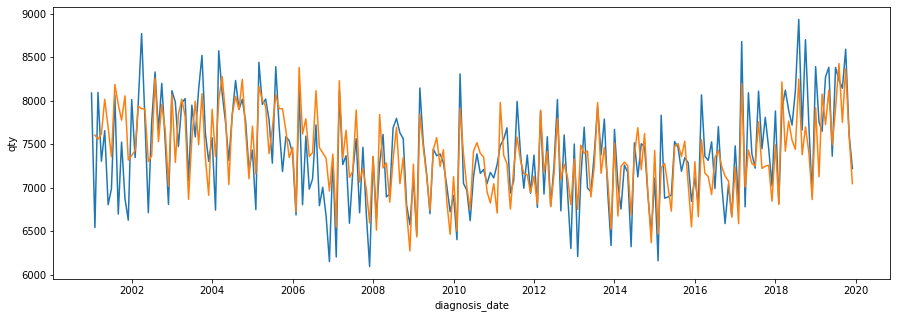

In [28]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='moving_average_3');

It's not possible analyse trends through the graph above

Let's try the same with a different rolling

In [29]:
tuberculosis_ts['moving_average_6'] = \
    tuberculosis_ts['qty'].rolling(6).mean()

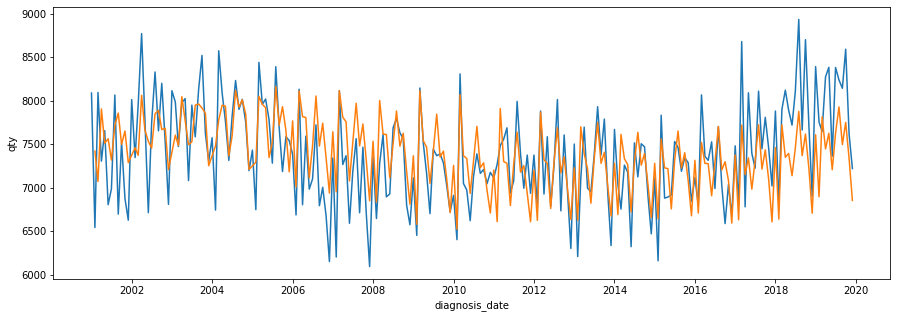

In [30]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='moving_average_6');

### NOTE: Why does it not work well even with  rolling=6?
Because our dataset is not sorted by date, and the 'rolling' will consider the average by the index.

### Let's correct it. Recalculate the moving average. And plot again.

In [31]:
tuberculosis_ts.head()

,diagnosis_date,qty,moving_average_3,moving_average_6
0,2001-01-01,8088,NaN,NaN
1,2002-01-01,8013,NaN,NaN
2,2003-01-01,8115,8072.000000,NaN
3,2004-01-01,7574,7900.666667,NaN
4,2005-01-01,7432,7707.000000,NaN


In [32]:
tuberculosis_ts.sort_values('diagnosis_date', inplace=True)
tuberculosis_ts.reset_index(drop=True, inplace=True)
tuberculosis_ts

,diagnosis_date,qty,moving_average_3,moving_average_6
0,2001-01-01,8088,NaN,NaN
1,2001-02-01,6542,7605.000000,7420.500000
2,2001-03-01,8095,7556.666667,7072.166667
3,2001-04-01,7305,7618.000000,7905.666667
4,2001-05-01,7656,8017.000000,7511.833333
...,...,...,...,...
223,2019-08-01,8239,8427.666667,7928.666667
224,2019-09-01,8143,7751.000000,7496.166667
225,2019-10-01,8592,8367.333333,7750.833333
226,2019-11-01,7615,7592.333333,7334.666667


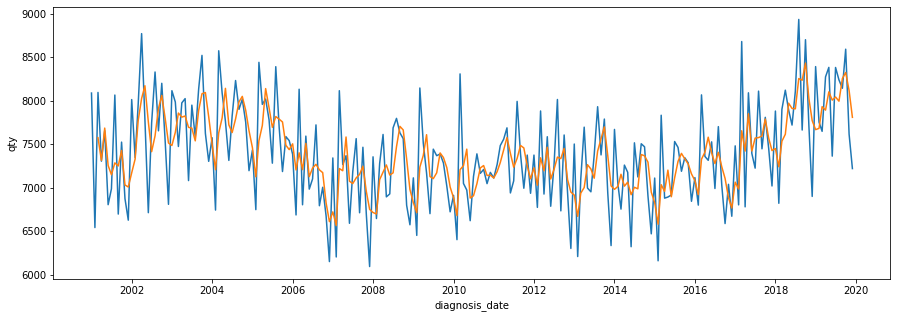

In [33]:
tuberculosis_ts['moving_average_3'] = \
    tuberculosis_ts['qty'].rolling(3).mean()

plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='moving_average_3');

In the graph, some peaks in the moving average line are happening after the cases line

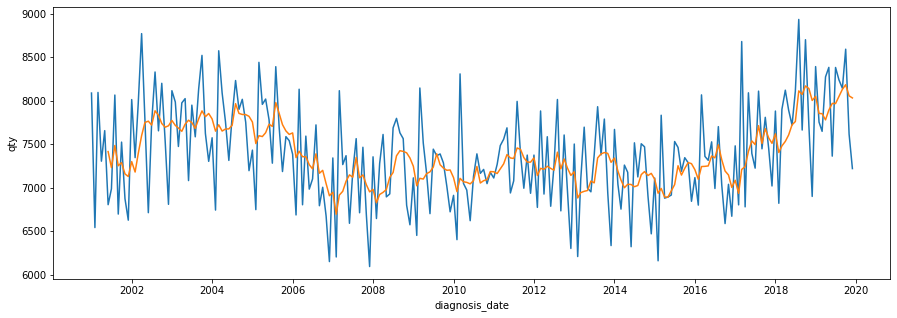

In [34]:
tuberculosis_ts['moving_average_6'] = \
    tuberculosis_ts['qty'].rolling(6).mean()

plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='moving_average_6');

the moving average smoothes the graph curve

to see the spikes better:

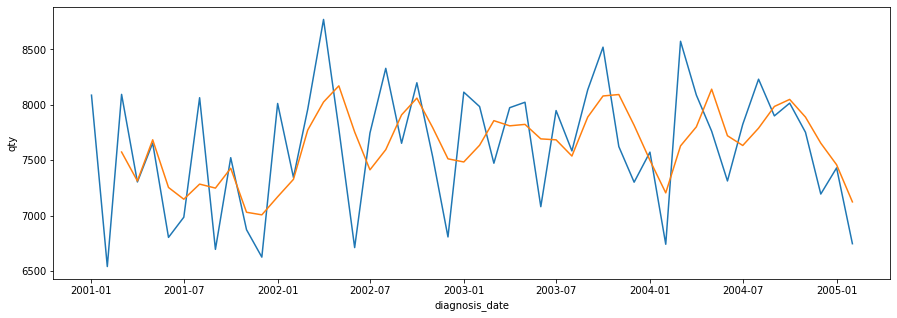

In [35]:
plt.figure(figsize=(15,5))


sns.lineplot(data=tuberculosis_ts[:50],
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts[:50],
             x='diagnosis_date',
             y='moving_average_3');

- Let's try to correct the peaks of moving average according to the peaks of cases.

### centered moving average

In [36]:
tuberculosis_ts['moving_average_3_c'] = \
    tuberculosis_ts['qty'].rolling(3, center=True).mean()

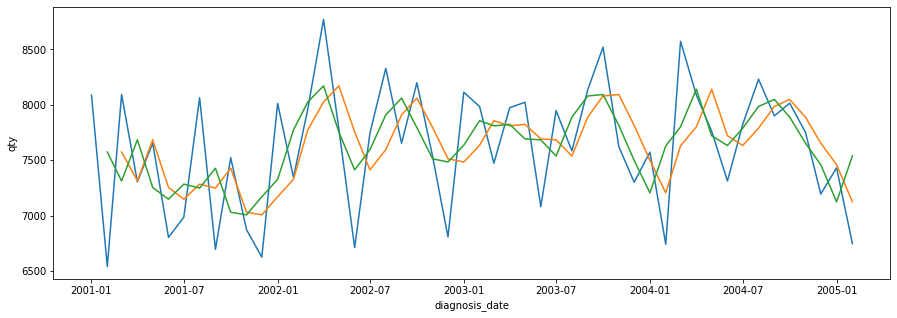

In [37]:
plt.figure(figsize=(15,5))


sns.lineplot(data=tuberculosis_ts[:50],
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts[:50],
             x='diagnosis_date',
             y='moving_average_3');

sns.lineplot(data=tuberculosis_ts[:50],
             x='diagnosis_date',
             y='moving_average_3_c');

**Challenge 02: Analyse the moving average with another period.**

**Challenge 03: Make your first prediction - use the averages (all data, or 3 last months).**

### Challenge 01: Search about frequency spectrum

http://web.stanford.edu/class/earthsys214/notes/series.html#a-simple-example

https://www2.mps.mpg.de/homes/lagg/talks/2004_IMPRS_spectral_analysis/span.pdf

### Challenge 02: Analyse the moving average with another period / window.

In [38]:
def lineplot_tuberculosis_cases_moving_average(rolling: int):
    
    df = tuberculosis_ts[['diagnosis_date', 'qty']].copy()
    df['moving_average_c'] = df['qty'].rolling(rolling, center=True).mean()
    
    plt.figure(figsize=(15,5))

    sns.lineplot(data=df,
                 x='diagnosis_date',
                 y='qty',
                 alpha=0.7,
                 label='cases')

    sns.lineplot(data=df,
                 x='diagnosis_date',
                 y='moving_average_c',
                 linewidth=1.9,
                 label='moving average - rolling '+str(rolling)
                 );

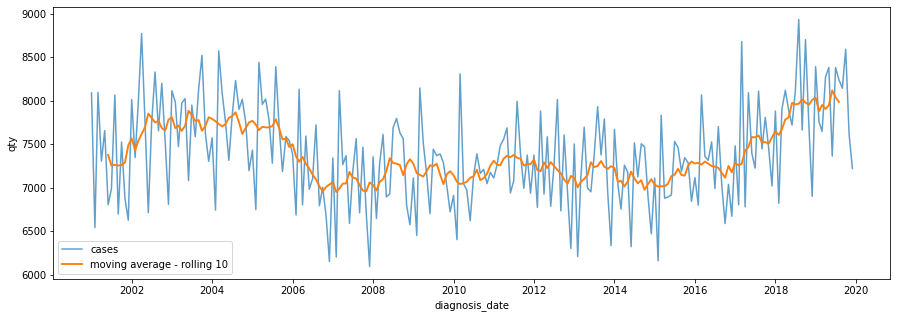

In [39]:
lineplot_tuberculosis_cases_moving_average(10)

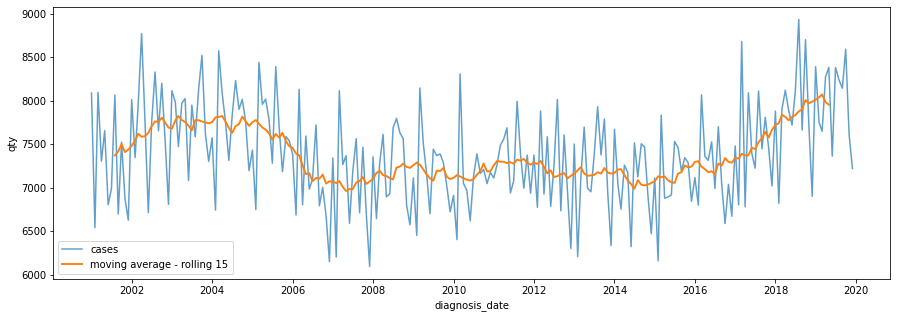

In [40]:
lineplot_tuberculosis_cases_moving_average(15)

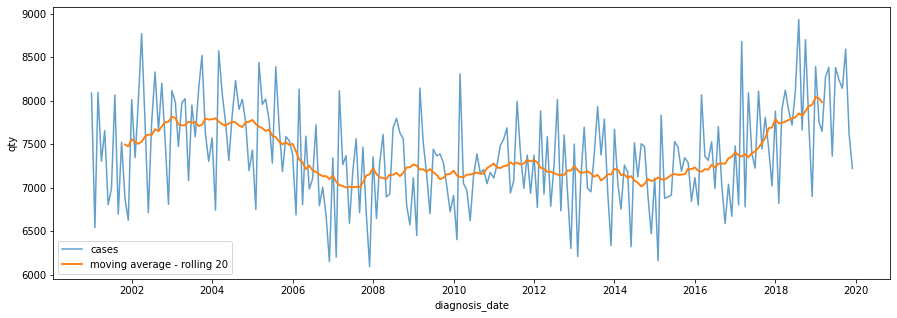

In [41]:
lineplot_tuberculosis_cases_moving_average(20)

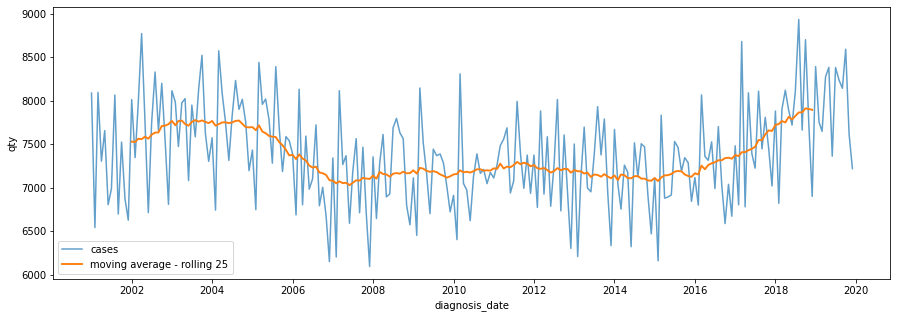

In [42]:
lineplot_tuberculosis_cases_moving_average(25)

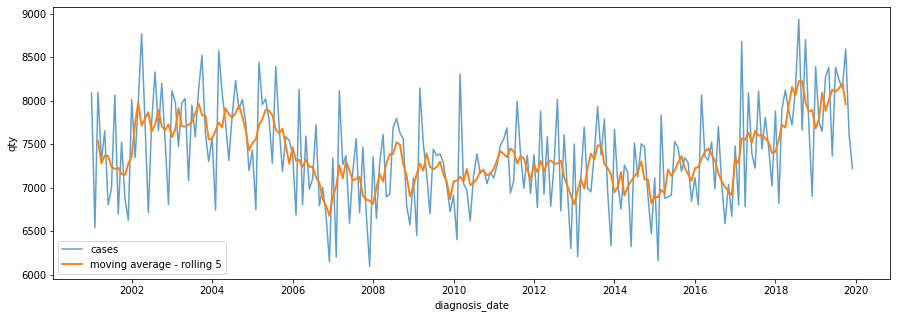

In [43]:
lineplot_tuberculosis_cases_moving_average(5)

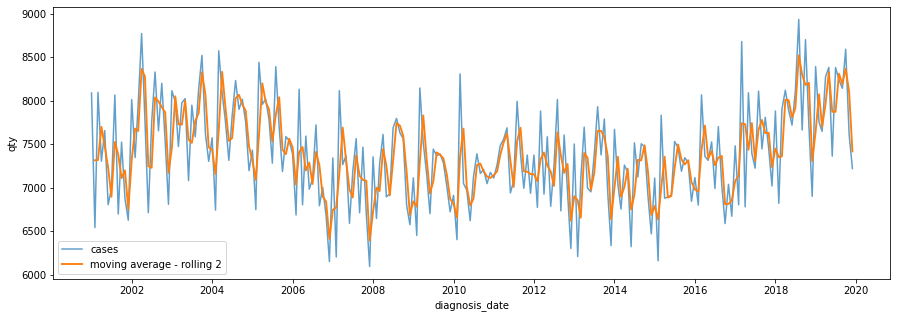

In [44]:
lineplot_tuberculosis_cases_moving_average(2)

### Challenge 03: Make your first prediction - use the averages (all data, or 3 last months).

code from: https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

In [45]:
# prepare situation
X = tuberculosis_ts['qty'].values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=7575.000000, expected=7305.000000
predicted=7314.000000, expected=7656.000000
predicted=7685.333333, expected=6805.000000
predicted=7255.333333, expected=6987.000000
predicted=7149.333333, expected=8065.000000
predicted=7285.666667, expected=6697.000000
predicted=7249.666667, expected=7524.000000
predicted=7428.666667, expected=6874.000000
predicted=7031.666667, expected=6627.000000
predicted=7008.333333, expected=8013.000000
predicted=7171.333333, expected=7346.000000
predicted=7328.666667, expected=7961.000000
predicted=7773.333333, expected=8771.000000
predicted=8026.000000, expected=7784.000000
predicted=8172.000000, expected=6713.000000
predicted=7756.000000, expected=7746.000000
predicted=7414.333333, expected=8330.000000
predicted=7596.333333, expected=7654.000000
predicted=7910.000000, expected=8200.000000
predicted=8061.333333, expected=7532.000000
predicted=7795.333333, expected=6809.000000
predicted=7513.666667, expected=8115.000000
predicted=7485.333333, expected=

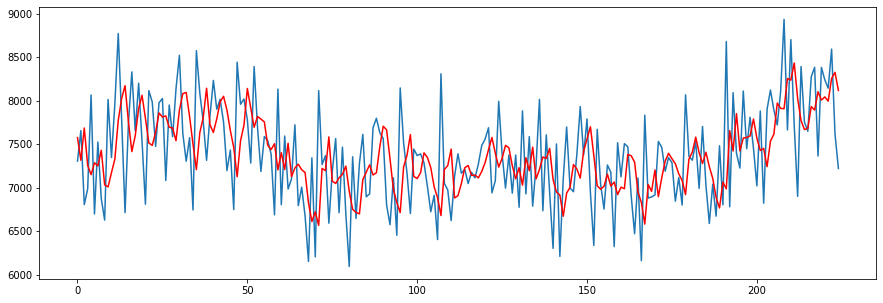

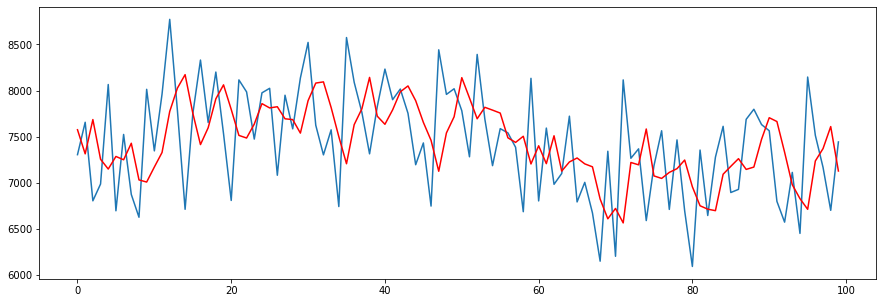

In [46]:
# plot
plt.figure(figsize=(15,5))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.figure(figsize=(15,5))

plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()

# Lesson 4 - Decomposition and Autocorrelation

---

# Lesson 4 - part 01 - Finding Patterns

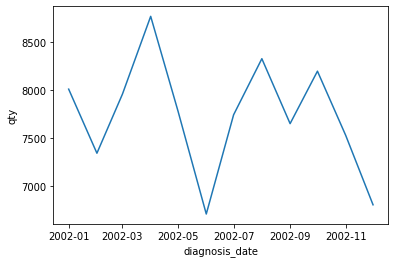

In [47]:
sns.lineplot(x='diagnosis_date',
             y='qty',
             data=tuberculosis_ts[12:24]);

**Challenge 01: Set the date as index and then make slices through the date.**

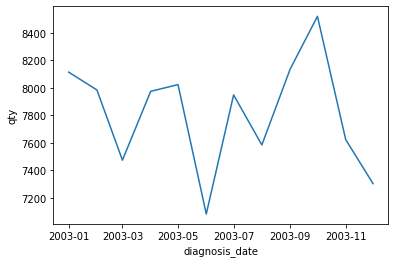

In [48]:
sns.lineplot(x='diagnosis_date',
             y='qty',
             data=tuberculosis_ts[24:36]);

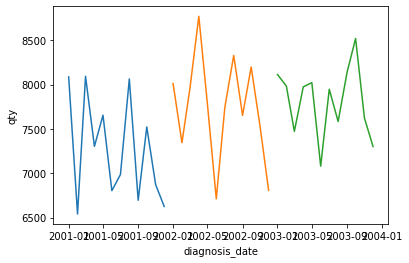

In [49]:
sns.lineplot(x='diagnosis_date',
             y='qty',
             data=tuberculosis_ts[:12]);

sns.lineplot(x='diagnosis_date',
             y='qty',
             data=tuberculosis_ts[12:24]);

sns.lineplot(x='diagnosis_date',
             y='qty',
             data=tuberculosis_ts[24:36]);

- note: the lines didn't overlap

I want to compare the lines for each year... is there some pattern?

In [50]:
tuberculosis_ts.head()

,diagnosis_date,qty,moving_average_3,moving_average_6,moving_average_3_c
0,2001-01-01,8088,NaN,NaN,NaN
1,2001-02-01,6542,NaN,NaN,7575.000000
2,2001-03-01,8095,7575.000000,NaN,7314.000000
3,2001-04-01,7305,7314.000000,NaN,7685.333333
4,2001-05-01,7656,7685.333333,NaN,7255.333333


In [51]:
tuberculosis_ts['month'] = \
    tuberculosis_ts['diagnosis_date'].dt.month

tuberculosis_ts['year'] = \
    tuberculosis_ts['diagnosis_date'].dt.year

In [52]:
tuberculosis_ts.head()

,diagnosis_date,qty,moving_average_3,moving_average_6,moving_average_3_c,month,year
0,2001-01-01,8088,NaN,NaN,NaN,1,2001
1,2001-02-01,6542,NaN,NaN,7575.000000,2,2001
2,2001-03-01,8095,7575.000000,NaN,7314.000000,3,2001
3,2001-04-01,7305,7314.000000,NaN,7685.333333,4,2001
4,2001-05-01,7656,7685.333333,NaN,7255.333333,5,2001


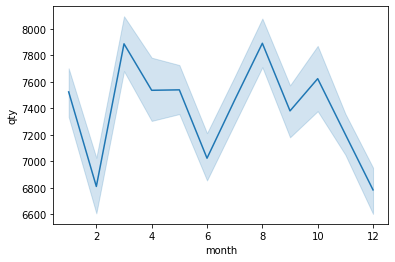

In [53]:
sns.lineplot(x='month',
             y='qty',
             data=tuberculosis_ts);

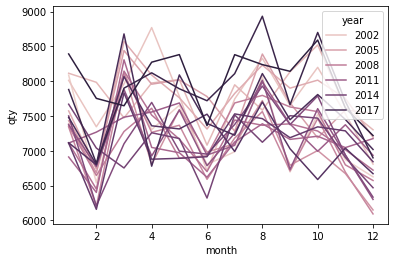

In [54]:
sns.lineplot(x='month',
             y='qty',
             data=tuberculosis_ts,
             hue='year');

**Challenge 02: Improve the graph above. Use another color palette.**

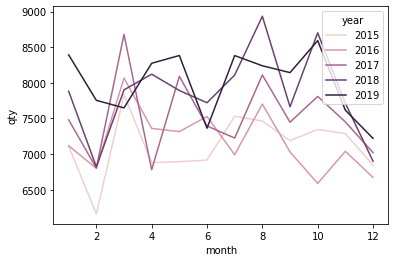

In [55]:
sns.lineplot(x='month',
             y='qty',
             data=tuberculosis_ts.query('year in [2019, 2018, 2017, 2016, 2015]'),
             hue='year');

- Analysing time series...
- Trying to find patterns...

stats models: https://www.statsmodels.org/stable/tsa.html

In [56]:
decomposition = \
    seasonal_decompose(tuberculosis_ts[['diagnosis_date', 'qty']]
                           .set_index('diagnosis_date'))

decomposition

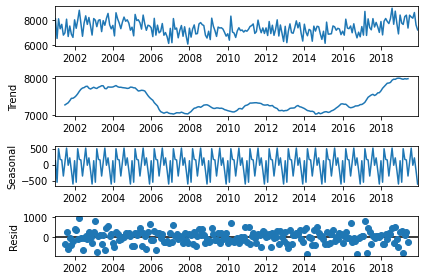

In [57]:
decomposition.plot();

- The first graph is 'observed'

**Challenge 03: Study about the graph below. How to combine the curves and generate the series.**

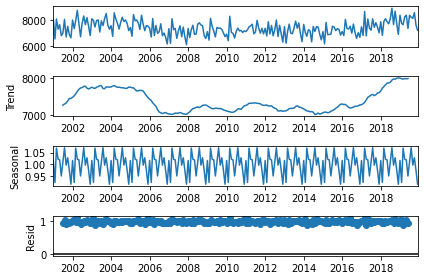

In [58]:
decomposition_multiplicative = \
    seasonal_decompose(tuberculosis_ts[['diagnosis_date', 'qty']]
                           .set_index('diagnosis_date'),
                       model='multiplicative')

decomposition_multiplicative.plot();

- With the residual lower we can better explain the time series used. This indicates that our time series has a multiplicative model.

- Multiplicative model: it creates the observed curve through the multiplication of trend and seasonal and residual.
- Adictive model: it creates the observed curve through the sum of trend and seasonal and residual.


As the residual value is almost 1, this multiplicative model cannot say too much about as well because everything I multiplies per 1, is itself.



http://web.vu.lt/mif/a.buteikis/wp-content/uploads/2019/02/Lecture_03.pdf

### Challenge 01: Set the date as index and then make slices through the date.

In [59]:
tuberculosis_ts.set_index('diagnosis_date', inplace=True)

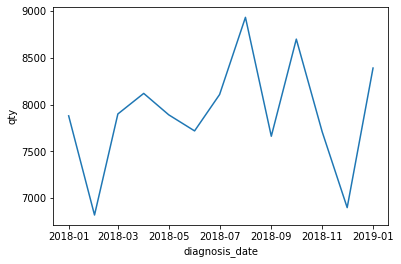

In [60]:
sns.lineplot(x='diagnosis_date',
             y='qty',
             data=tuberculosis_ts['2018-01-01':'2019-01-01']);

### Challenge 02: Improve the graph above. Use another color palette.

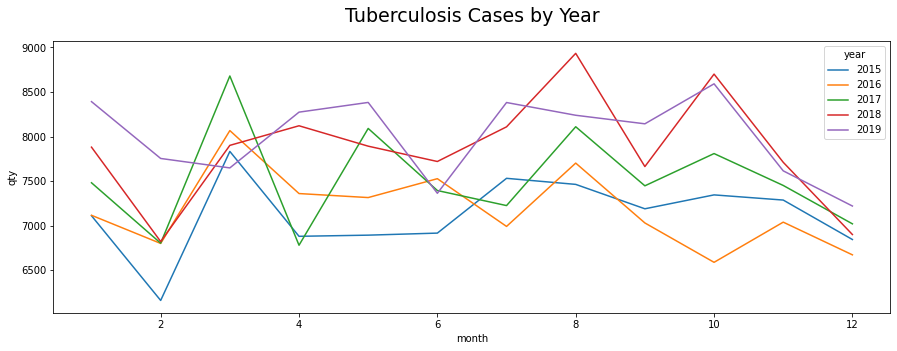

In [61]:
plt.figure(figsize=(15,5))

sns.lineplot(x='month',
             y='qty',
             data=tuberculosis_ts.query('year in [2019, 2018, 2017, 2016, 2015]'),
             hue='year',
             palette="tab10")

plt.title('Tuberculosis Cases by Year', fontsize=19, pad=19);

### Challenge 03: Study about the graph below. How to combine the curves and generate the series.

- Observated: Observed data

- Trend: The estimated trend component

- Seasonal: The estimated seasonal component

- Residual: The estimated residuals


[/wikipedia](https://en.wikipedia.org/wiki/Decomposition_of_time_series):
Decomposition based on rates of change
This is an important technique for all types of time series analysis, especially for seasonal adjustment. It seeks to construct, from an observed time series, a number of component series (that could be used to reconstruct the original by additions or multiplications) where each of these has a certain characteristic or type of behavior. For example, time series are usually decomposed into:
- $T_c$, the trend component at time t, which reflects the long-term progression of the series (secular variation). A trend exists when there is a persistent increasing or decreasing direction in the data. The trend component does not have to be linear.
- $C_t$, the cyclical component at time t, which reflects repeated but non-periodic fluctuations. The duration of these fluctuations depend on the nature of the time series.
- $S_t$, the seasonal component at time t, reflecting seasonality (seasonal variation). A seasonal pattern exists when a time series is influenced by seasonal factors. Seasonality occurs over a fixed and known period (e.g., the quarter of the year, the month, or day of the week).
- $I_t$, the irregular component (or "noise") at time t, which describes random, irregular influences. It represents the residuals or remainder of the time series after the other components have been removed.

Hence a time series using an additive model can be thought of as <br>
$y_{t}=T_{t}+C_{t}+S_{t}+I_{t}$, <br>

whereas a multiplicative model would be <br>
$y_{t}=T_{t}\times C_{t}\times S_{t}\times I_{t}$

Sometimes the trend and cyclical components are grouped into one, called the trend-cycle component. The trend-cycle component can just be referred to as the "trend" component, even though it may contain cyclical behavior.

https://medium.com/swlh/time-series-seasonal-decomposition-a300fe0f34dd

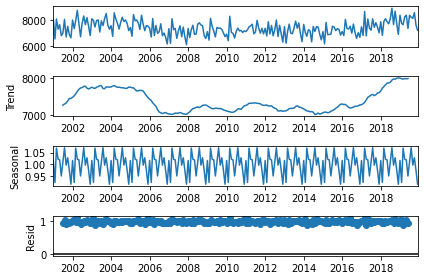

In [62]:
decomposition_multiplicative.plot();

# Lesson 4 - part 02 - Decomposition of Time Series

- analysing another example

In [63]:
url_passengers = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv'

passengers = pd.read_csv(url_passengers)
passengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [64]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [65]:
passengers['Month'] = pd.to_datetime(passengers['Month'])

passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


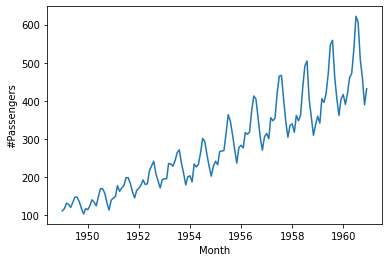

In [66]:
sns.lineplot(x='Month',
             y='#Passengers',
             data=passengers);

- We can see a trend and seasonality

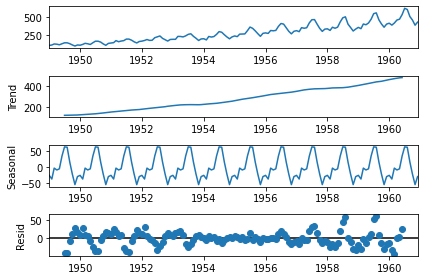

In [67]:
decomposition_passengers = \
    seasonal_decompose(passengers.set_index('Month'))

decomposition_passengers.plot();

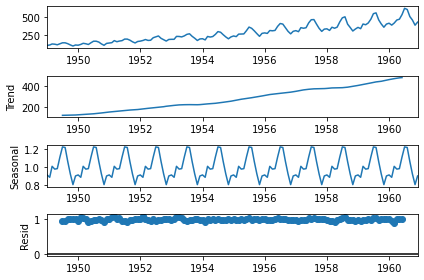

In [68]:
decomposition_passengers_multiplicative = \
    seasonal_decompose(passengers.set_index('Month'),
                       model='multiplicative')

decomposition_passengers_multiplicative.plot();

### Challenge 04: Improve the decomposition graphs.

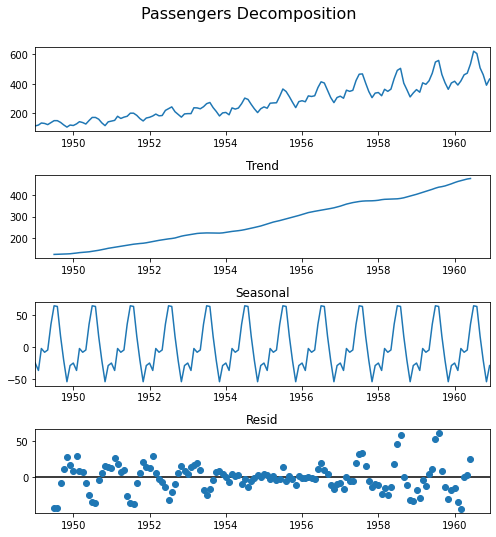

In [69]:
# plt.rcParams['figure.figsize'] = (9, 7)

fig = decomposition_passengers.plot();

fig.suptitle('Passengers Decomposition', fontsize=16, y=1.06)
fig.set_figheight(7)
fig.set_figwidth(7)

for i in range(4):
    fig.axes[i].set_title(fig.axes[i].get_ylabel())
    fig.axes[i].set_ylabel('')

fig.tight_layout()

### Challenge 05: Do the decomposition analysis for leprosy data.

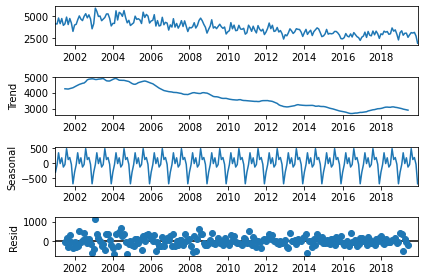

In [70]:
decomposition_leprosy_additive = \
    seasonal_decompose(leprosy_ts.query('date.dt.year > 2000')
                                 .set_index('date'))
    
decomposition_leprosy_additive.plot();

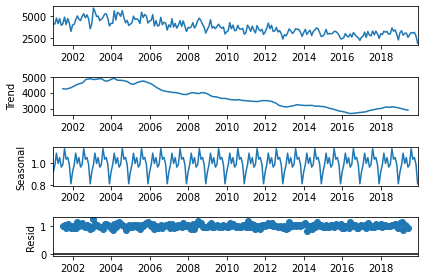

In [71]:
decomposition_leprosy_multiplicative = \
    seasonal_decompose(leprosy_ts.query('date.dt.year > 2000')
                                 .set_index('date'),
                       model='multiplicative')
    
decomposition_leprosy_multiplicative.plot();

# Lesson 4 - part 03 - Autocorrelation and Parcial Autocorrelation

https://www.tylervigen.com/spurious-correlations

cross correlation: two variables.

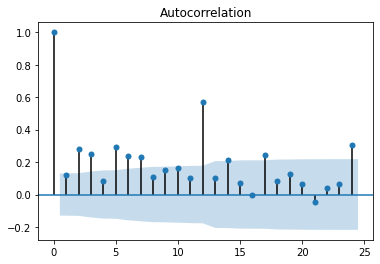

In [72]:
plot_acf(tuberculosis_ts['qty']);

y-axis: indicates the autocorrelation value
x-axis: lags for the analysis correlation

for example, when the lag is 0 it means that we are compare the correlation between my serie with itself, so the value is 1.
with the lag equals 12 we have a high correlation.


For those ones that are above the confidence level, we considerate that it's something correlated. On the other hand, for those ones that are inside the confidence level cloud can be a random factor.

**Challenge 06: Make the autocorrelation and parcial autocorrelation analysis in the covid-19 cases.**

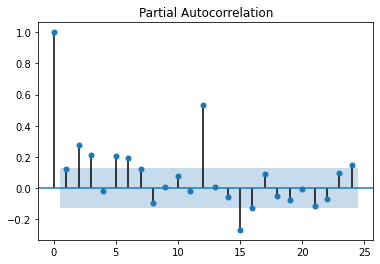

In [73]:
plot_pacf(tuberculosis_ts['qty']);

parcial autocorrelation: normalized according to lag equals 1.

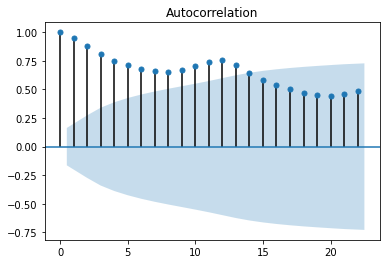

In [74]:
plot_acf(passengers['#Passengers']);

we can notice a seasonality.

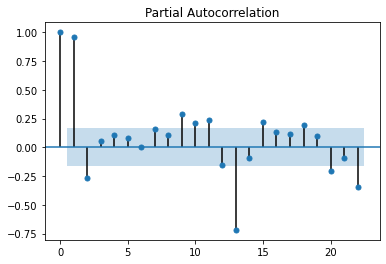

In [75]:
plot_pacf(passengers['#Passengers']);

**Challenge 07: Make the autocorrelation and parcial autocorrelation analysis in the leprosy cases.**

### Challenge 06: Make the autocorrelation and parcial autocorrelation analysis in the covid-19 cases.

In [87]:
url_covid = 'https://github.com/alura-cursos/agendamento-hospitalar/blob/main/dados/COVID19-BRASILIO-06-11-2020.csv.gz?raw=true'

covid = pd.read_csv(url_covid, compression='gzip')

covid.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [94]:
covid['date'] = pd.to_datetime(covid['date'])

covid_rn = covid[(covid.state == 'RN') & 
                 (covid.place_type == 'state')] \
                .copy

covid_rn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 566774 to 566985
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            212 non-null    datetime64[ns]
 1   state                           212 non-null    object        
 2   city                            0 non-null      object        
 3   place_type                      212 non-null    object        
 4   confirmed                       212 non-null    int64         
 5   deaths                          212 non-null    int64         
 6   order_for_place                 212 non-null    int64         
 7   is_last                         212 non-null    bool          
 8   estimated_population_2019       212 non-null    float64       
 9   estimated_population            212 non-null    float64       
 10  city_ibge_code                  212 non-null    float64       
 11

In [95]:
covid_rn.head()

covid_rn.sort_values('date', inplace=True)

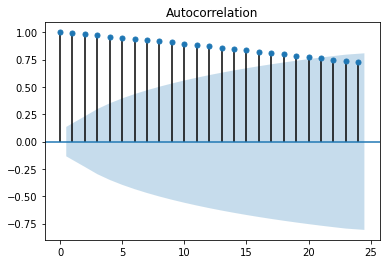

In [98]:
plot_acf(covid_rn['confirmed']);

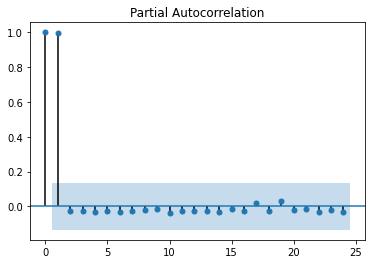

In [99]:
plot_pacf(covid_rn['confirmed']);

### Challenge 07: Make the autocorrelation and parcial autocorrelation analysis in the leprosy cases.

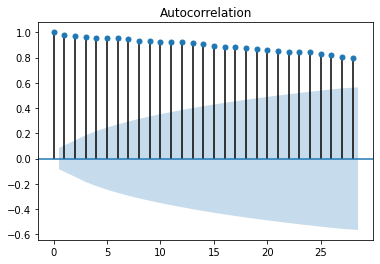

In [100]:
plot_acf(leprosy_ts['cases']);

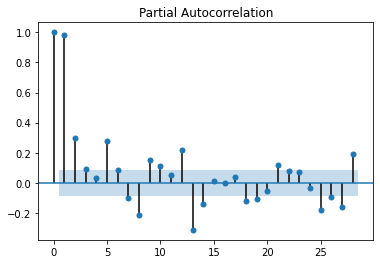

In [101]:
plot_pacf(leprosy_ts['cases']);